# Hessian Analysis
In this notebook we explore the hessian metrics with quantized models.

In [23]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
import ast
import os
import sys
from statistics import mean
import pickle

# import modules from common metrics
module_path = os.path.abspath(os.path.join('../../workspace/common/metrics/')) # or the path to your source code
sys.path.insert(0, module_path)
from hessian import Hessian

### Utility methods

In [24]:
def plot_2d_heatmap(values, 
                    title, 
                    min_max=(0, 1), 
                    x_label='Layers', 
                    y_label='Layers', 
                    scale_label='Value', 
                    cmap='Greens',
                    show_value=True):
    '''
    Method used to plot a 2D heatmap using Seaborn.
    '''
    # Set up the figure and axes
    plt.figure(figsize=(7, 6))

    # Create a heatmap using Seaborn
    sns.heatmap(values, 
                cmap=cmap, 
                annot=show_value, 
                fmt=".2f", 
                vmin=min_max[0], 
                vmax=min_max[1],
                cbar_kws={'label': scale_label})

    # Customize the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Display the plot
    plt.show()
    
def read_file(file_path, name='hessian'):
    
    file_path = os.path.join(file_path, f'{name}.pkl')
    
    try:
        with open(file_path, 'rb') as f:
            result = pickle.load(f)
        return result[name]
    except FileNotFoundError:
        print(f"File not found. ({file_path})")
    except Exception as e:
        print("Error occurred:", e)

In [25]:
# search space
batch_sizes = [16, 32, 64, 128, 256, 512, 1024]
learning_rates = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]
precisions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# ECON model (Autoencoder)

In [26]:
DATA_PATH = '/data/tbaldi/work/checkpoint/'
DATASET_DIR = '../../data/ECON/Elegun'
DATASET_FILE = 'nELinks5.npy'

size = 'baseline'

/tmp/ipykernel_66301/2179490958.py:31: RuntimeWarning: divide by zero encountered in log10
  log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
/tmp/ipykernel_66301/2179490958.py:31: RuntimeWarning: invalid value encountered in log10
  log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
/tmp/ipykernel_66301/2179490958.py:32: RuntimeWarning: divide by zero encountered in log10
  log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)
/tmp/ipykernel_66301/2179490958.py:32: RuntimeWarning: invalid value encountered in log10
  log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)


----------------------------------------------------------------------------------------------------


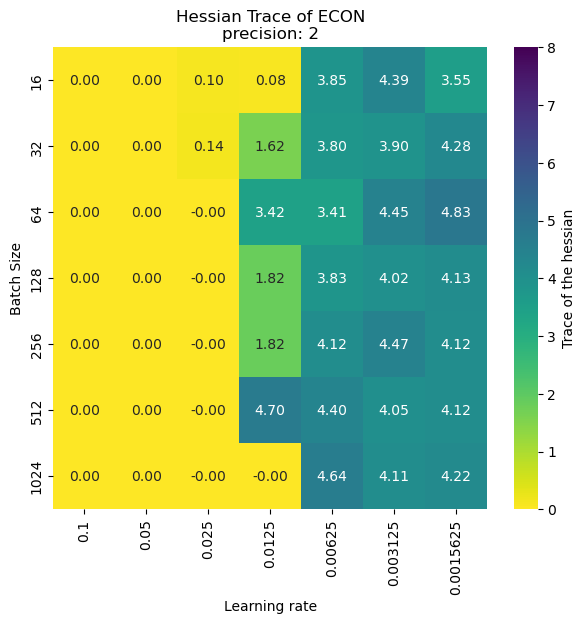

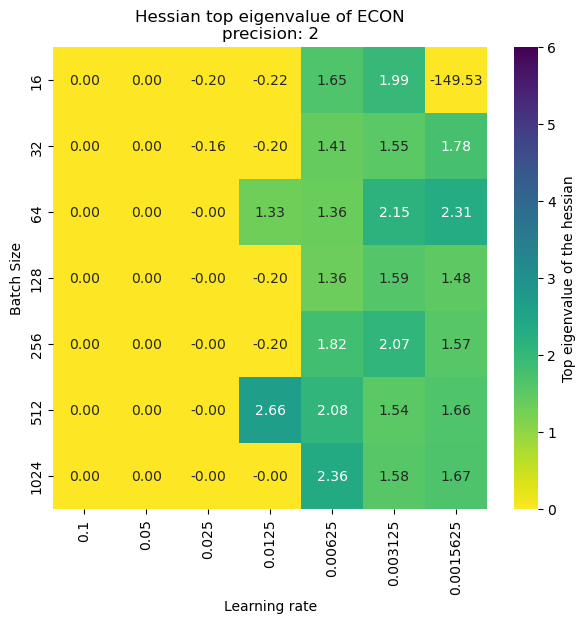

----------------------------------------------------------------------------------------------------


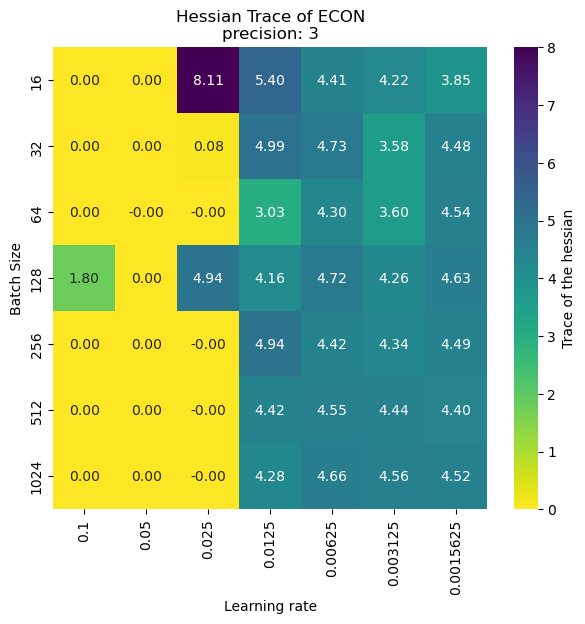

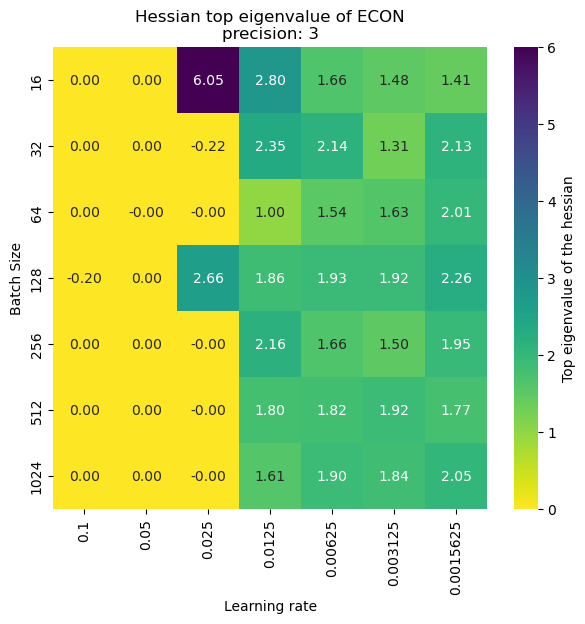

----------------------------------------------------------------------------------------------------


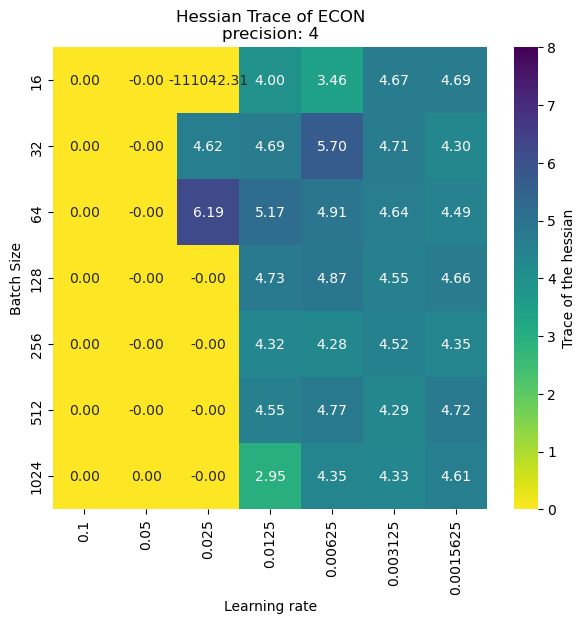

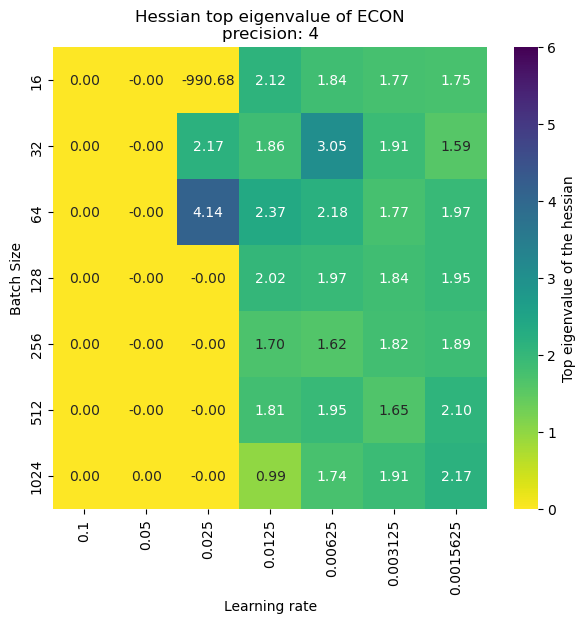

----------------------------------------------------------------------------------------------------


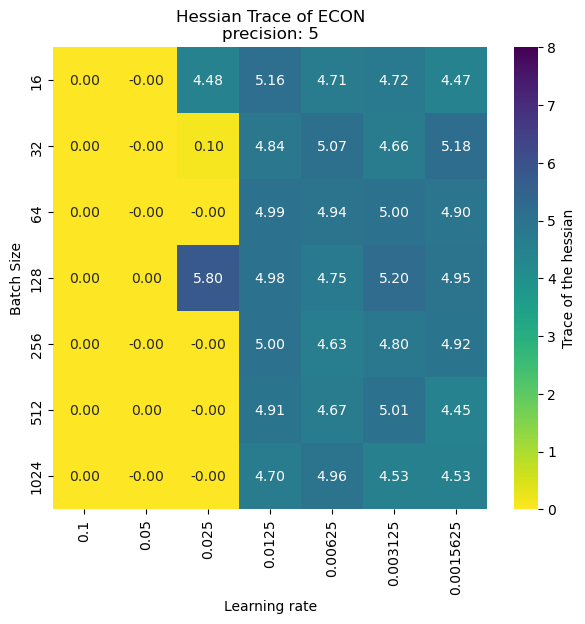

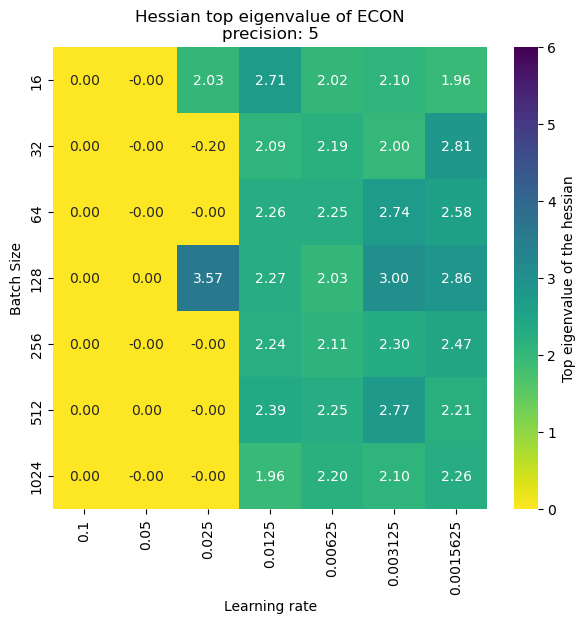

----------------------------------------------------------------------------------------------------


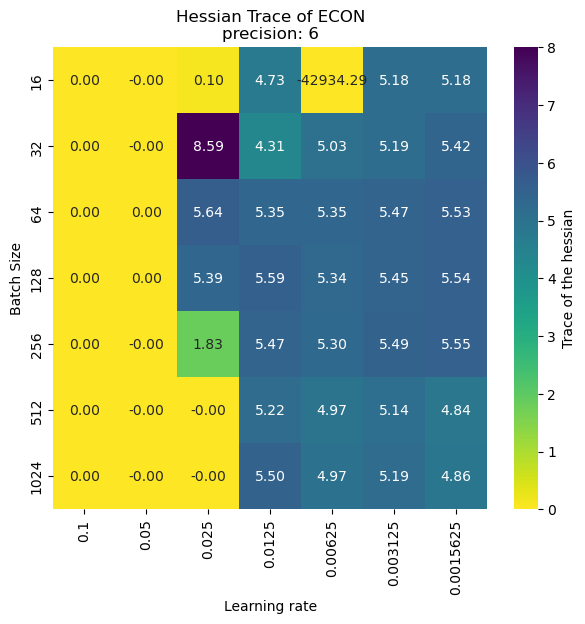

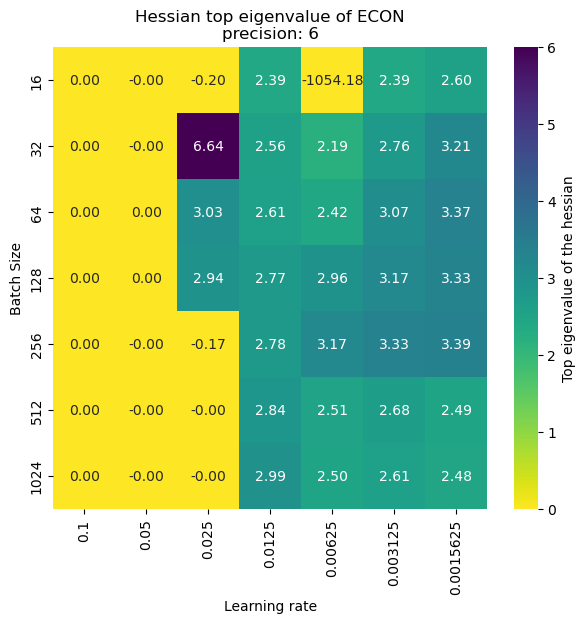

----------------------------------------------------------------------------------------------------


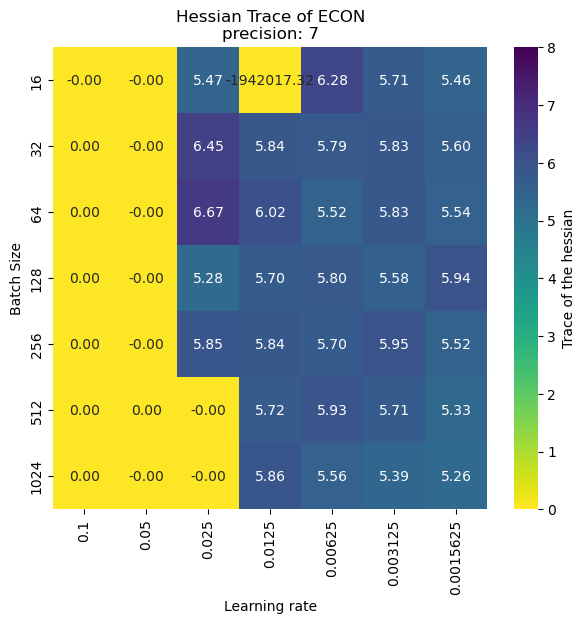

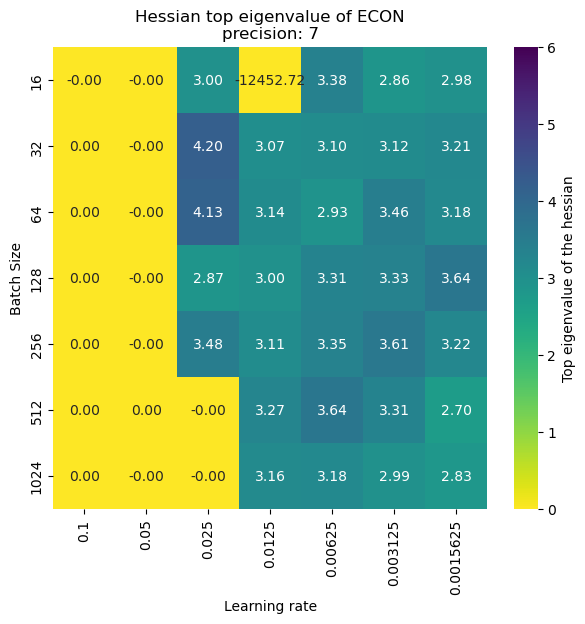

----------------------------------------------------------------------------------------------------


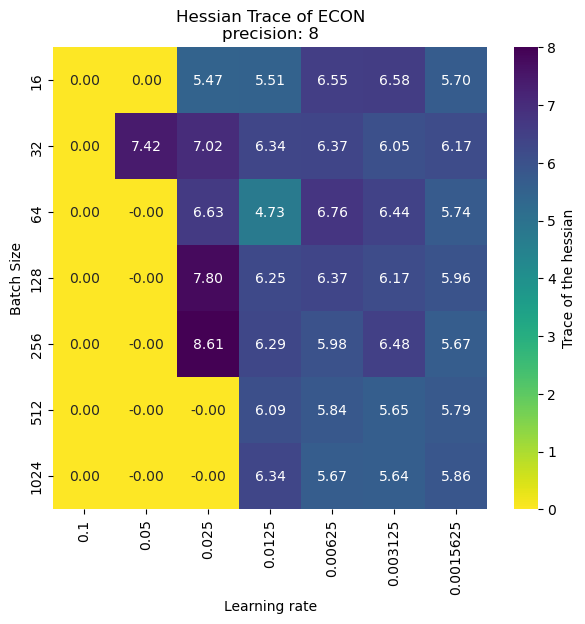

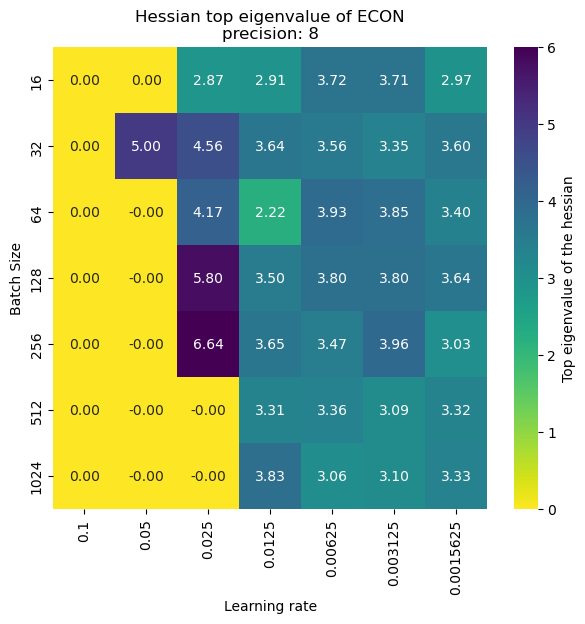

----------------------------------------------------------------------------------------------------


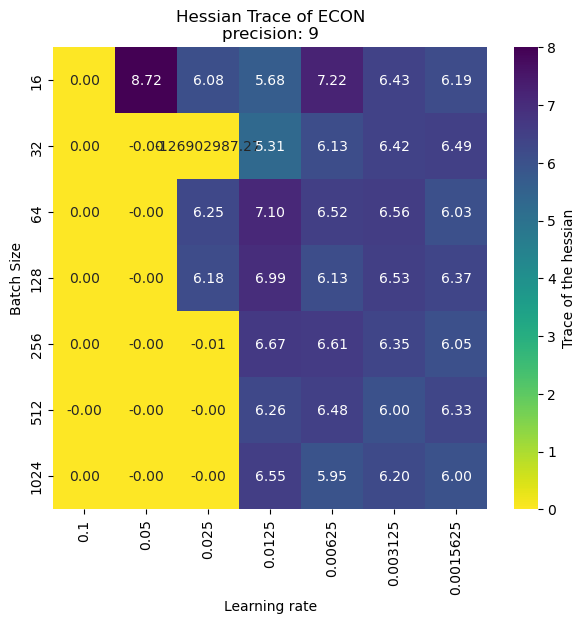

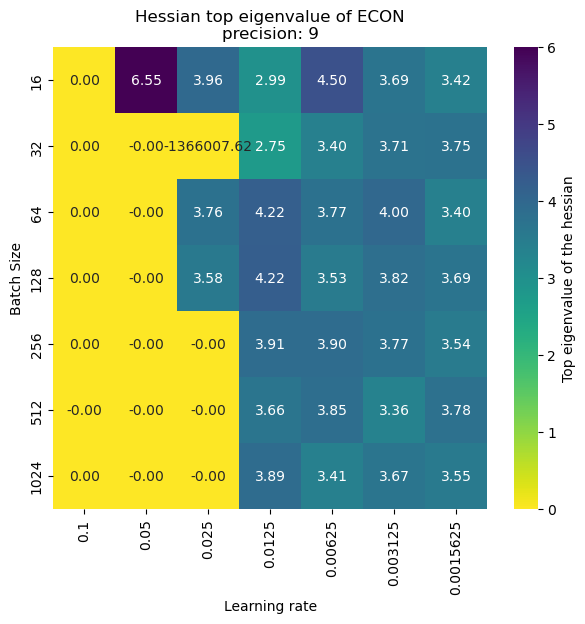

----------------------------------------------------------------------------------------------------


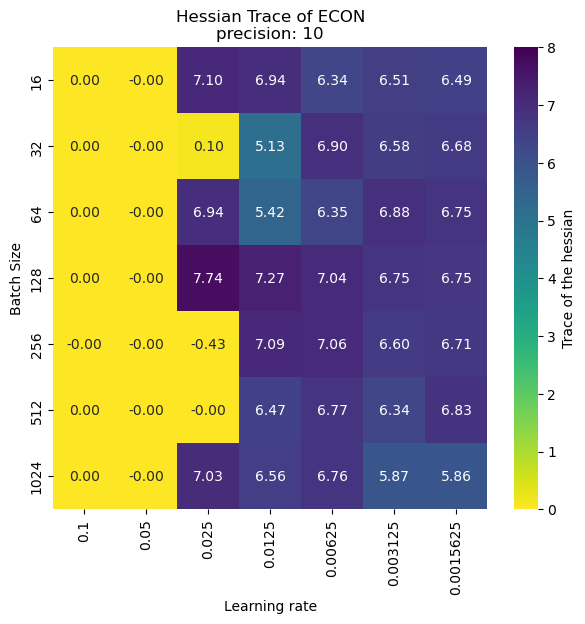

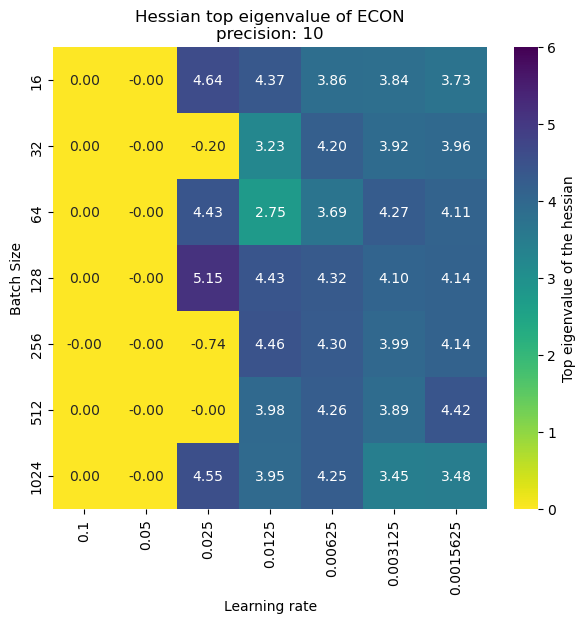

----------------------------------------------------------------------------------------------------


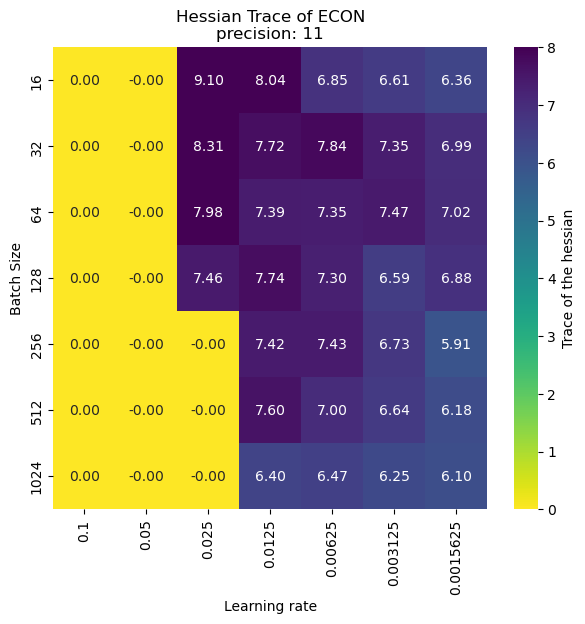

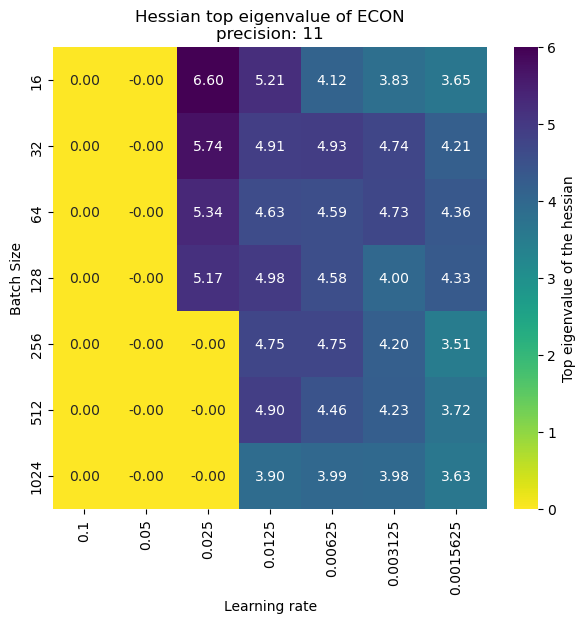

In [27]:
hessian_distribution = []
for p in precisions:
    trace_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    eigen_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            path = os.path.join(DATA_PATH, f'bs{bs}_lr{lr}/ECON_{p}b/{size}/')

            result = -1
            trace = []
            eigen_value = []
            try:
                for i in range(1, 4):
                    result = read_file(path, name=f"hessian_{i}")
                    trace.append(sum(result['trace']))
                    eigen_value.append(result['eigenvalues'][0])
            except:
                print("Error: cannot open the file!")
                
            trace_matrix[x, y] = mean(trace)
            eigen_matrix[x, y] = mean(eigen_value)
            
            hessian_distribution.append({
                'precision': p, 
                'trace': mean(trace),
                'eigenvalue': mean(eigen_value),
                'batch_size': str(bs),
                'learning_rate': str(lr),
            })
            
    log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
    log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)
    
    log_trace_matrix = pd.DataFrame(log_trace_matrix, 
                                    index=batch_sizes, 
                                    columns=learning_rates)
    log_eigen_matrix = pd.DataFrame(log_eigen_matrix, 
                                    index=batch_sizes, 
                                    columns=learning_rates)
    
    print('-'*100)
    
    plot_2d_heatmap(log_trace_matrix, 
                    f'Hessian Trace of ECON\nprecision: {p}', 
                    (0, 8),
                    'Learning rate',
                    'Batch Size',
                    'Trace of the hessian',
                    cmap='viridis_r')
    
    
    plot_2d_heatmap(log_eigen_matrix, 
                    f'Hessian top eigenvalue of ECON\nprecision: {p}', 
                    (0, 6),
                    'Learning rate',
                    'Batch Size',
                    'Top eigenvalue of the hessian',
                    cmap='viridis_r')
            
            

In [28]:
hessian_distribution_df = pd.DataFrame(hessian_distribution)
hessian_distribution_df.to_csv("./results/econ/hessian.csv", index=False)

/tmp/ipykernel_66301/2017150010.py:24: RuntimeWarning: divide by zero encountered in log10
  log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
/tmp/ipykernel_66301/2017150010.py:24: RuntimeWarning: invalid value encountered in log10
  log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
/tmp/ipykernel_66301/2017150010.py:25: RuntimeWarning: divide by zero encountered in log10
  log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)
/tmp/ipykernel_66301/2017150010.py:25: RuntimeWarning: invalid value encountered in log10
  log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)


----------------------------------------------------------------------------------------------------


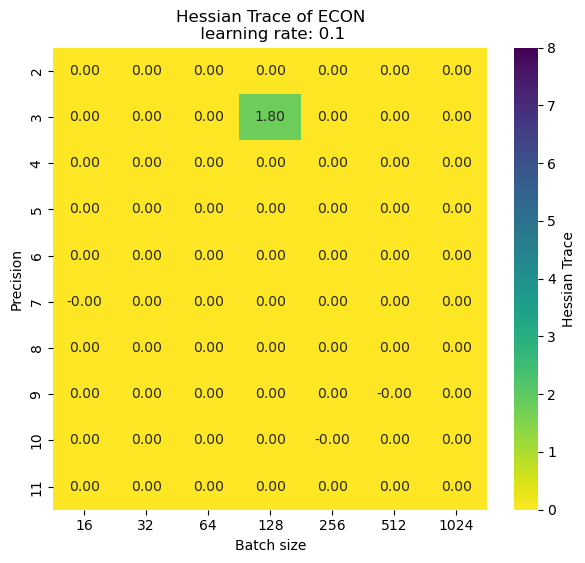

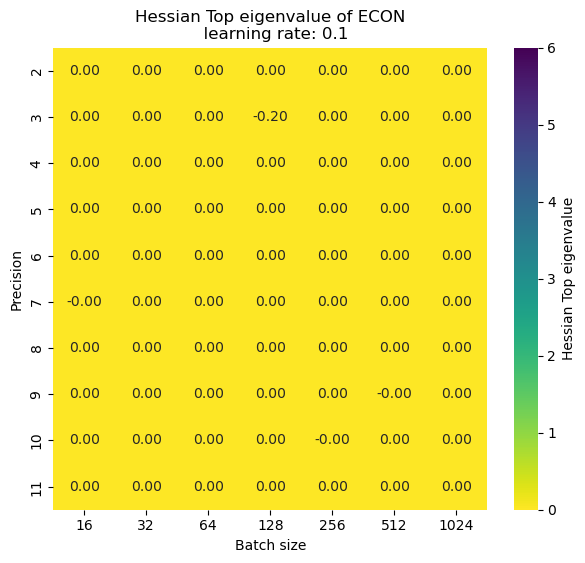

----------------------------------------------------------------------------------------------------


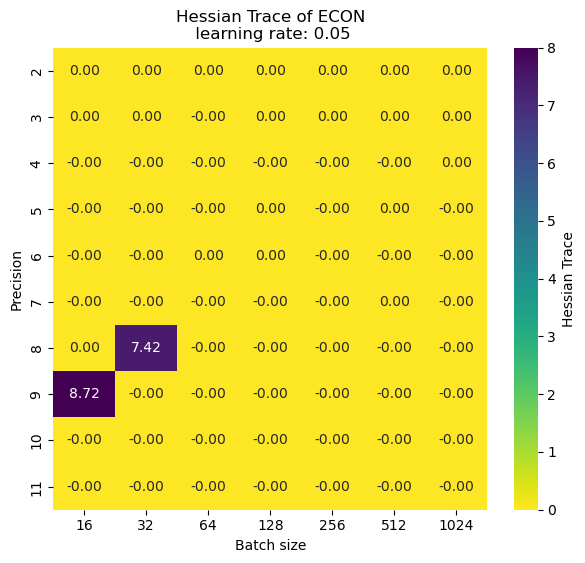

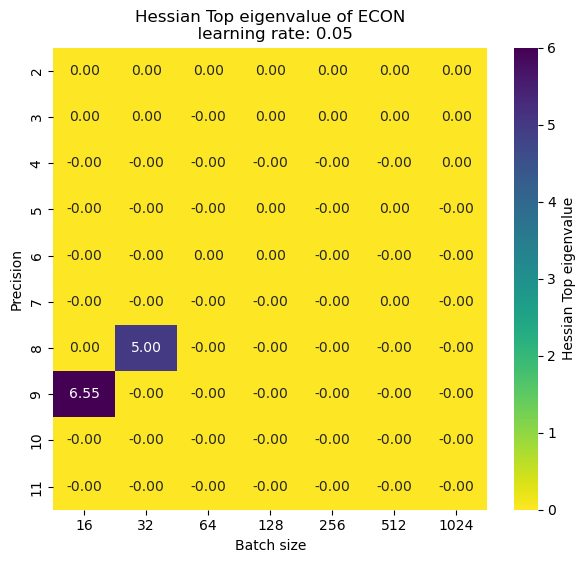

----------------------------------------------------------------------------------------------------


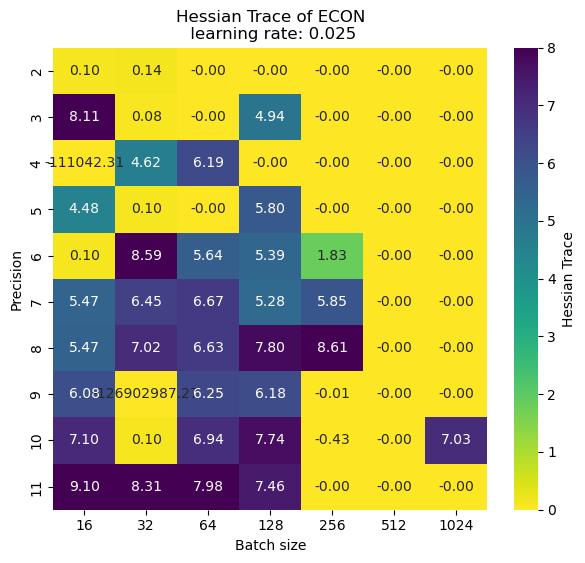

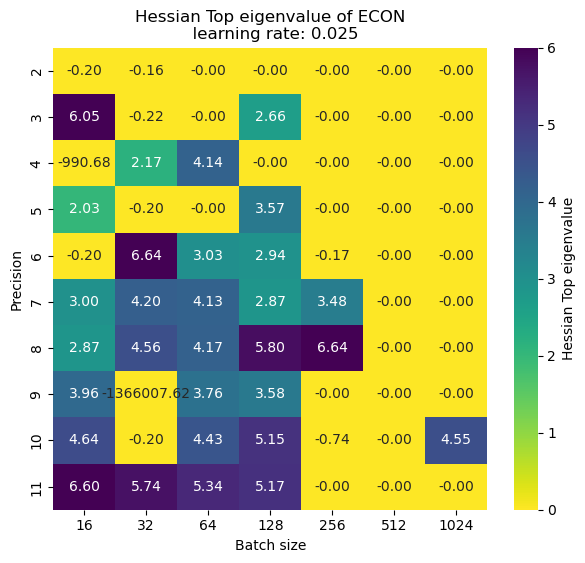

----------------------------------------------------------------------------------------------------


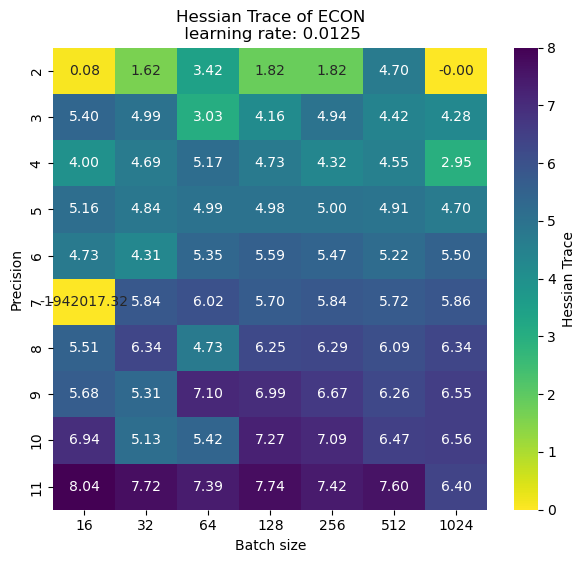

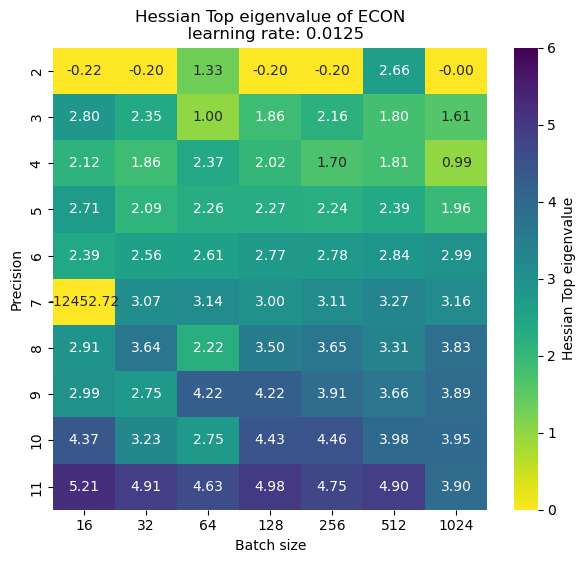

----------------------------------------------------------------------------------------------------


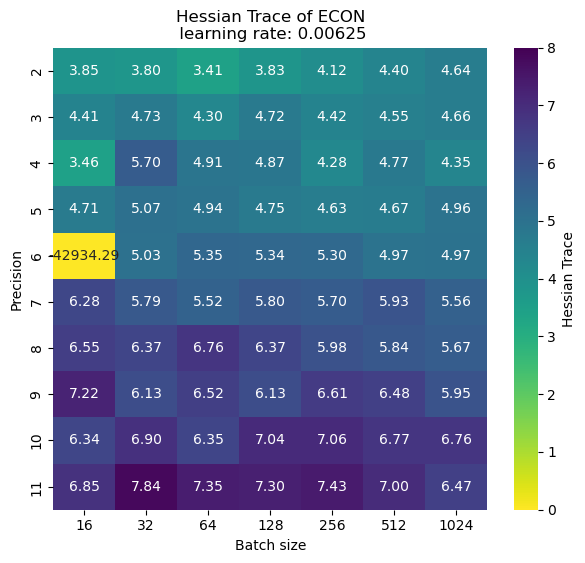

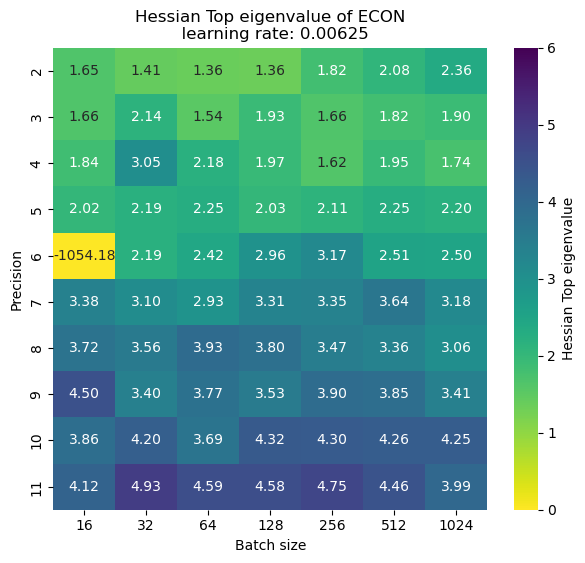

----------------------------------------------------------------------------------------------------


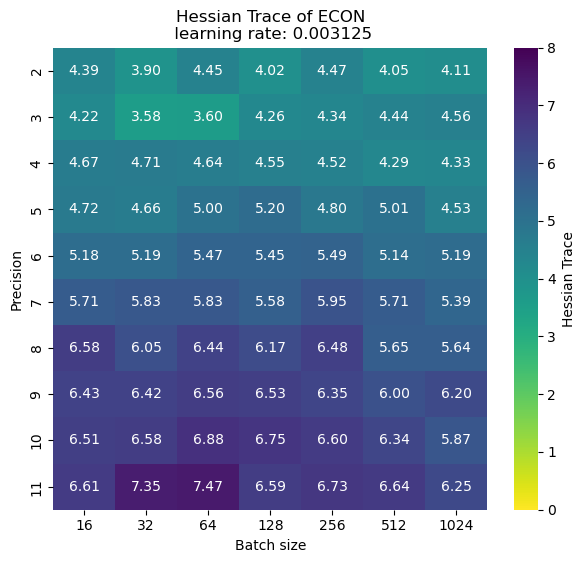

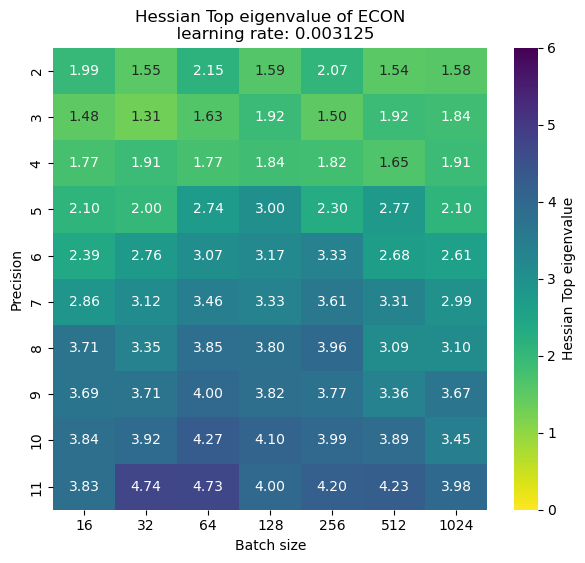

----------------------------------------------------------------------------------------------------


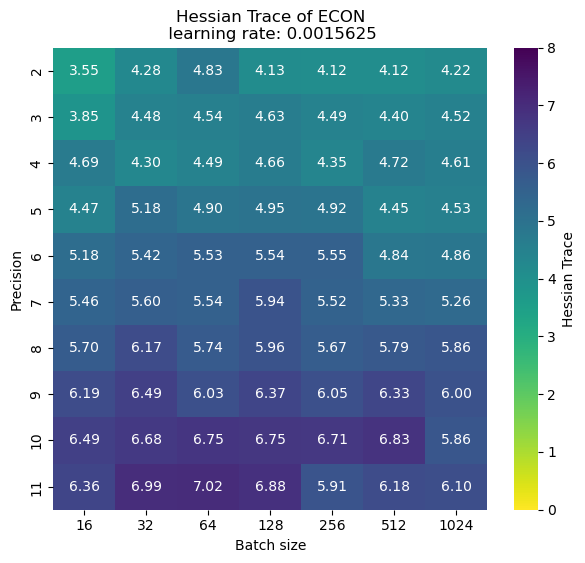

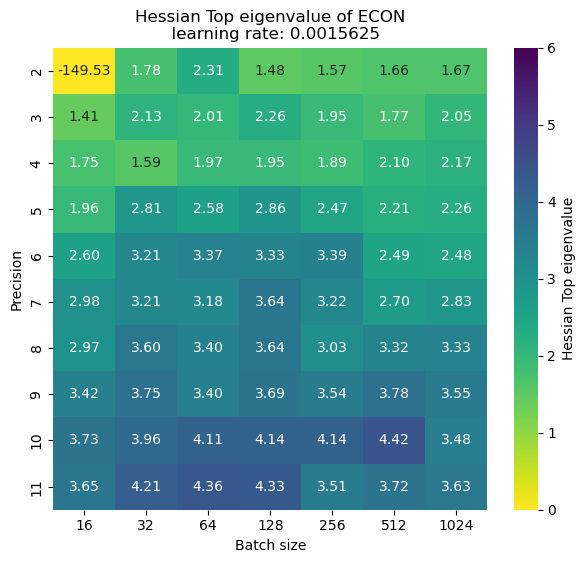

In [29]:
for lr in learning_rates:
    trace_matrix = np.zeros((len(precisions), len(batch_sizes)))
    eigen_matrix = np.zeros((len(precisions), len(batch_sizes)))
    for y, bs in enumerate(batch_sizes):
        for x, p in enumerate(precisions):

            path = os.path.join(DATA_PATH, f'bs{bs}_lr{lr}/ECON_{p}b/{size}/')

            result = -1
            trace = []
            eigen_value = []
            try:
                for i in range(1, 4):
                    result = read_file(path, name=f"hessian_{i}")
                    trace.append(sum(result['trace']))
                    eigen_value.append(result['eigenvalues'][0])
            except:
                print("Error: cannot open the file!")
                
            trace_matrix[x, y] = mean(trace)
            eigen_matrix[x, y] = mean(eigen_value)
                
            
    log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
    log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)
    
    log_trace_matrix = pd.DataFrame(log_trace_matrix, 
                                    index=precisions, 
                                    columns=batch_sizes)
    log_eigen_matrix = pd.DataFrame(log_eigen_matrix, 
                                    index=precisions, 
                                    columns=batch_sizes)
    print('-'*100)
    
    plot_2d_heatmap(log_trace_matrix, 
                    f'Hessian Trace of ECON\n learning rate: {lr}', 
                    (0, 8),
                    'Batch size',
                    'Precision',
                    'Hessian Trace',
                    cmap='viridis_r')
    plot_2d_heatmap(log_eigen_matrix, 
                    f'Hessian Top eigenvalue of ECON\n  learning rate: {lr}', 
                    (0, 6),
                    'Batch size',
                    'Precision',
                    'Hessian Top eigenvalue',
                    cmap='viridis_r')

# RN08 (TinyResNet)

In [30]:
DATA_PATH = '/data/tbaldi/work/checkpoint/'
DATASET_DIR = '../../data/RN08'

/tmp/ipykernel_66301/1376024205.py:29: RuntimeWarning: invalid value encountered in log10
  log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
/tmp/ipykernel_66301/1376024205.py:30: RuntimeWarning: invalid value encountered in log10
  log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)


----------------------------------------------------------------------------------------------------


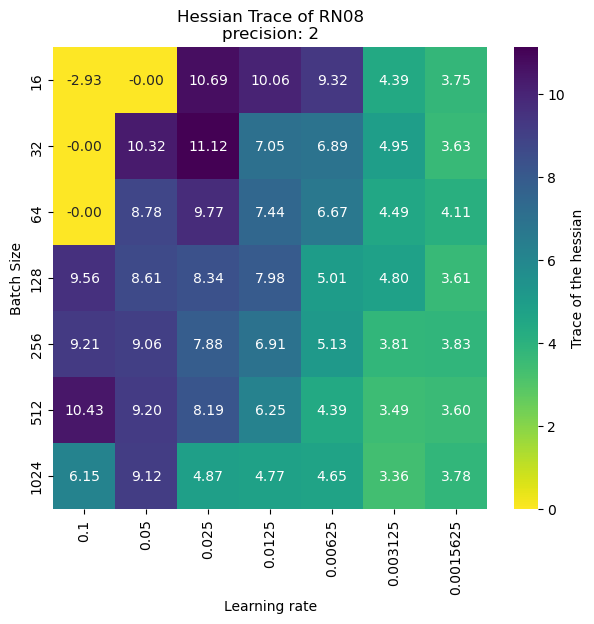

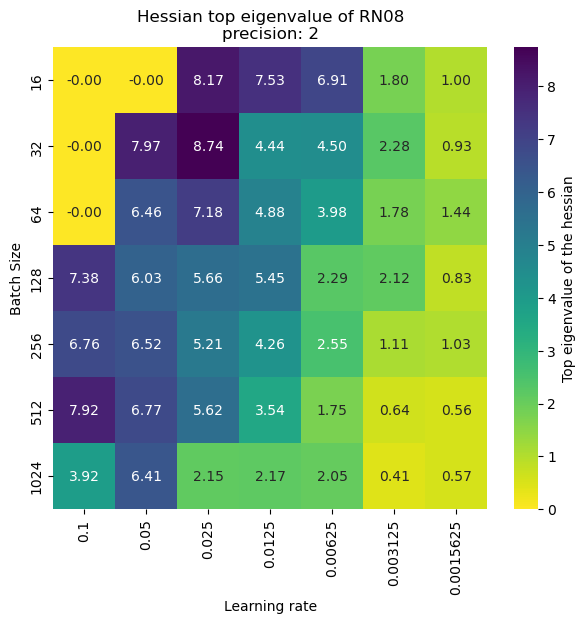

/tmp/ipykernel_66301/1376024205.py:30: RuntimeWarning: divide by zero encountered in log10
  log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)


----------------------------------------------------------------------------------------------------


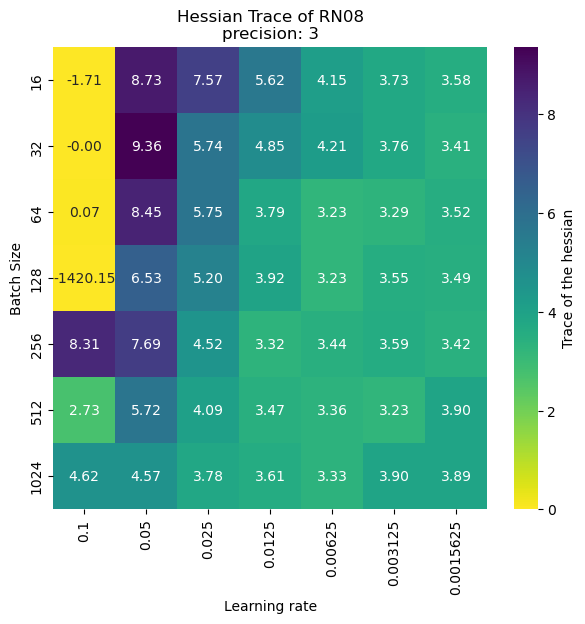

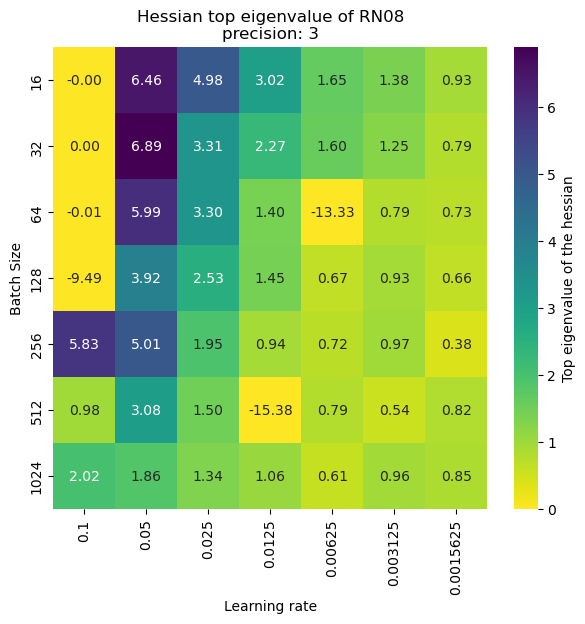

----------------------------------------------------------------------------------------------------


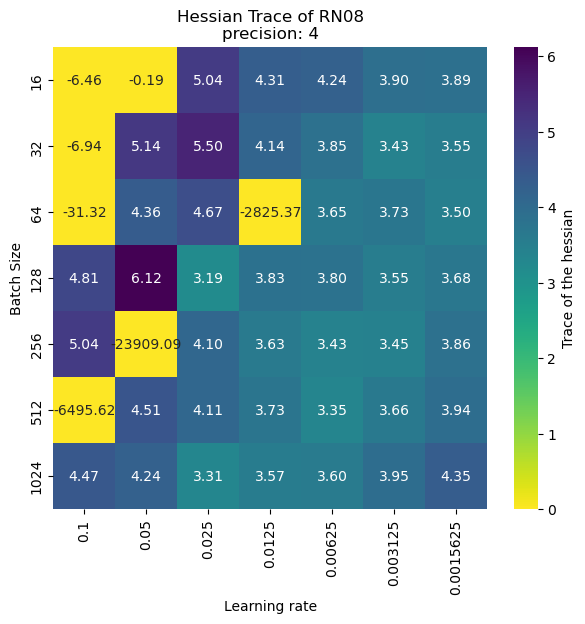

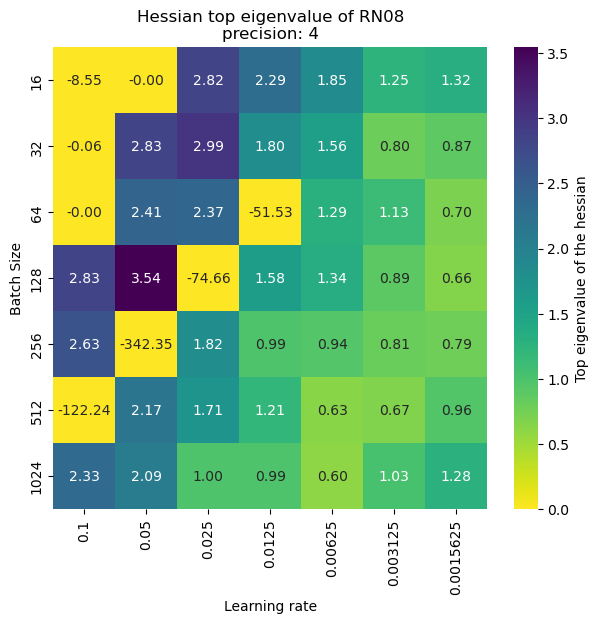

/tmp/ipykernel_66301/1376024205.py:29: RuntimeWarning: divide by zero encountered in log10
  log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)


----------------------------------------------------------------------------------------------------


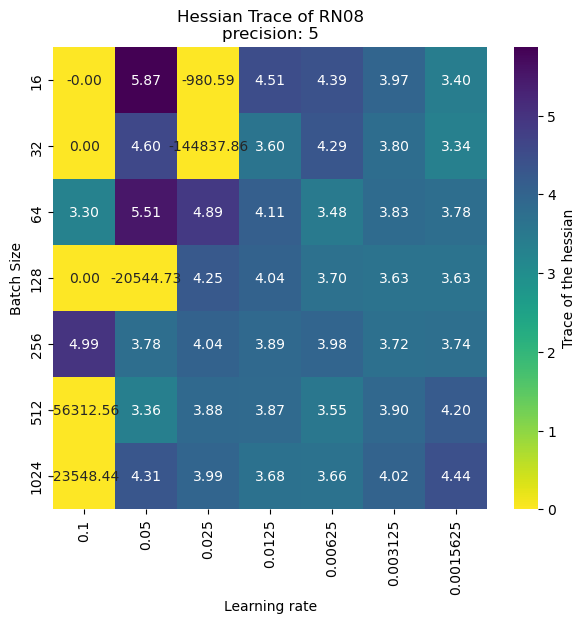

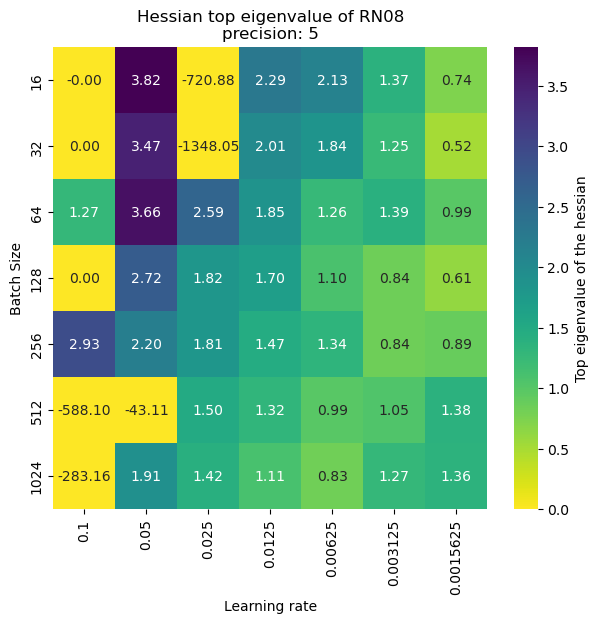

----------------------------------------------------------------------------------------------------


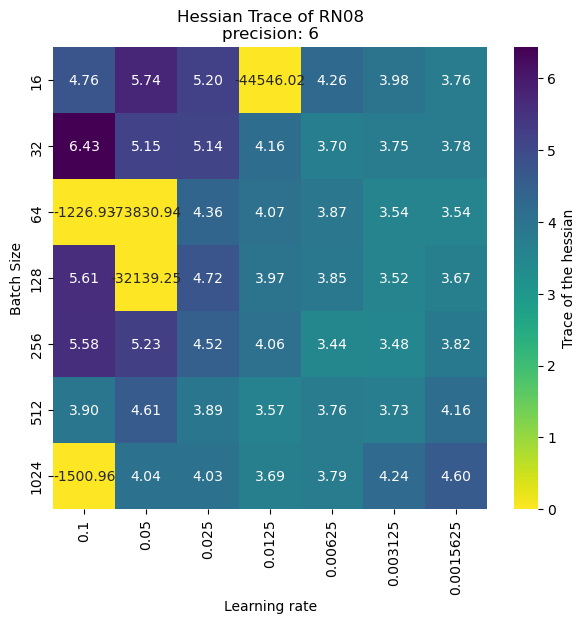

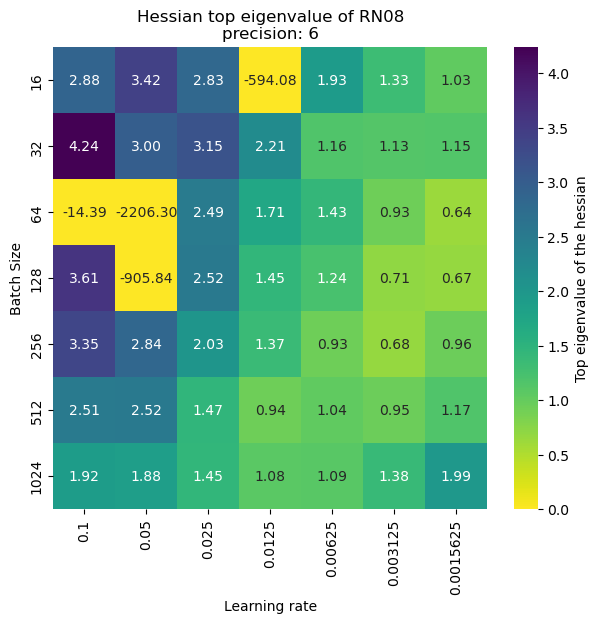

----------------------------------------------------------------------------------------------------


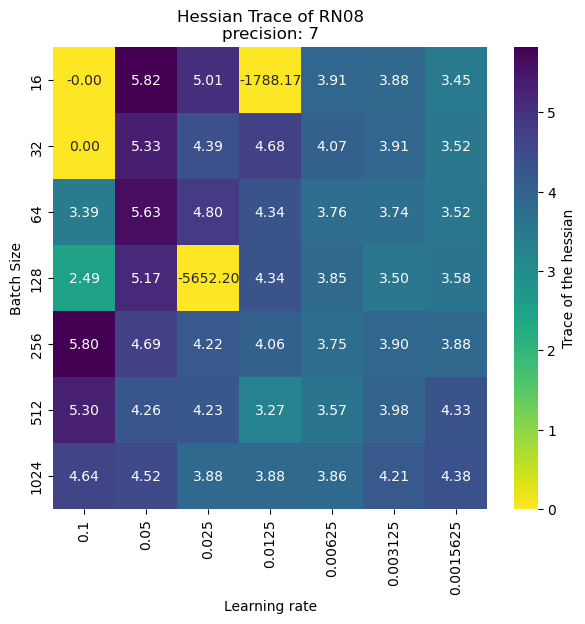

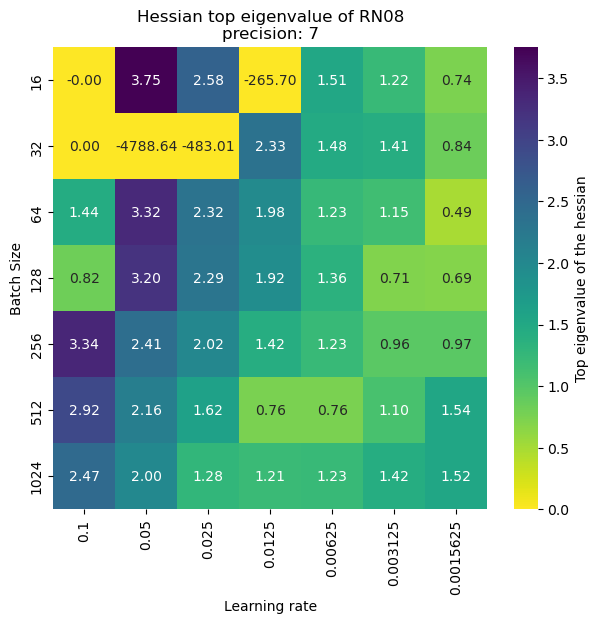

----------------------------------------------------------------------------------------------------


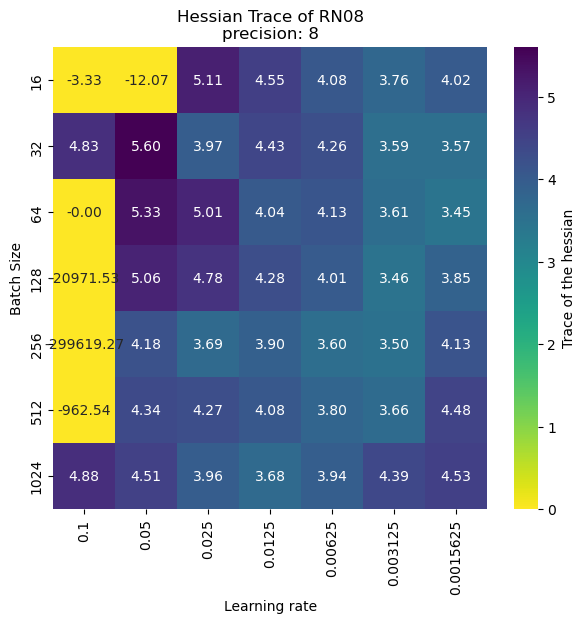

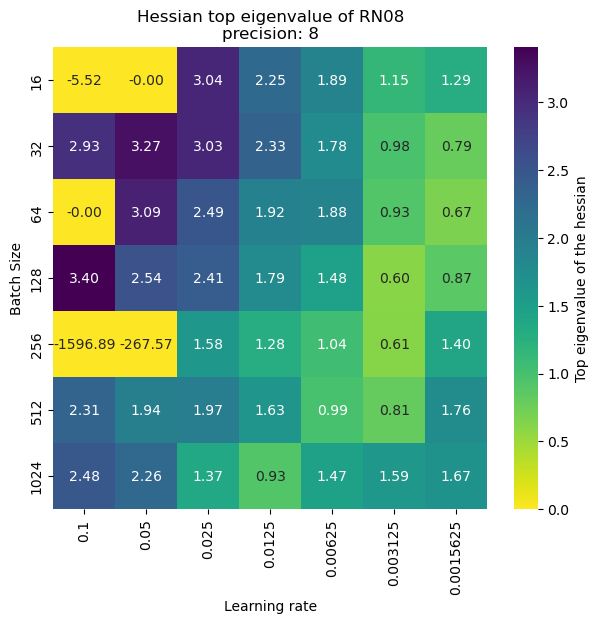

----------------------------------------------------------------------------------------------------


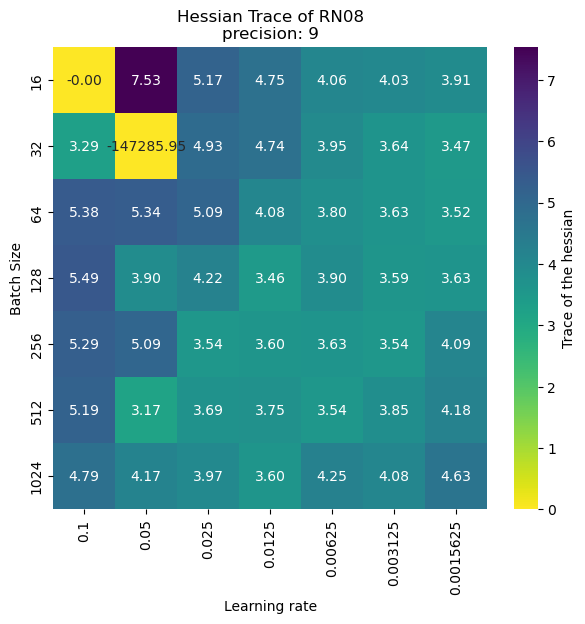

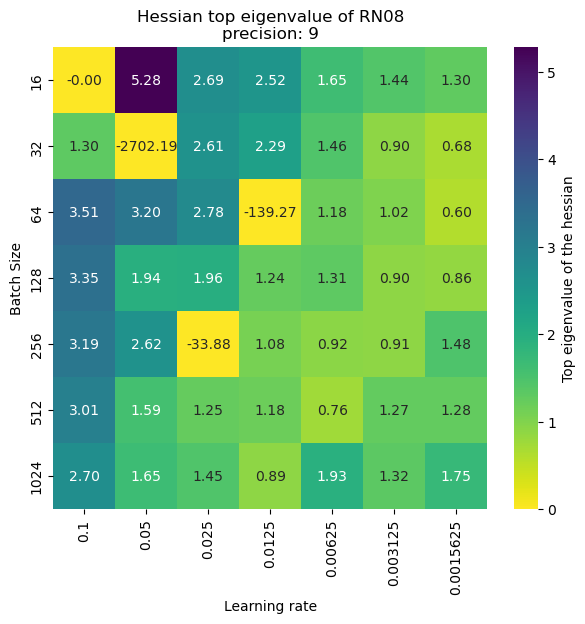

----------------------------------------------------------------------------------------------------


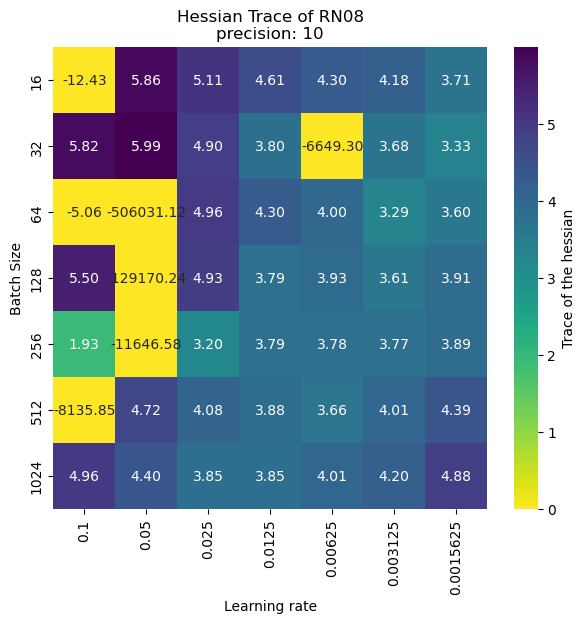

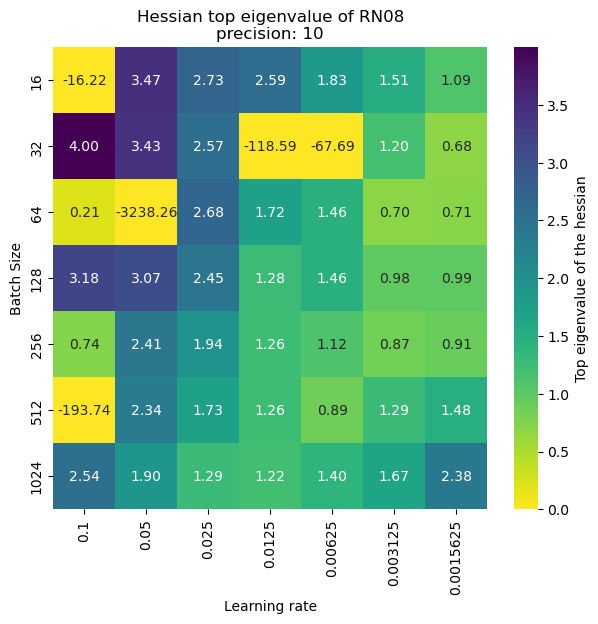

----------------------------------------------------------------------------------------------------


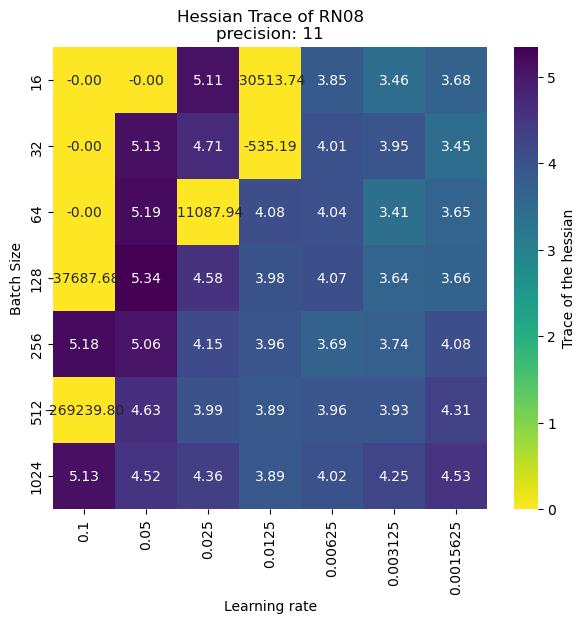

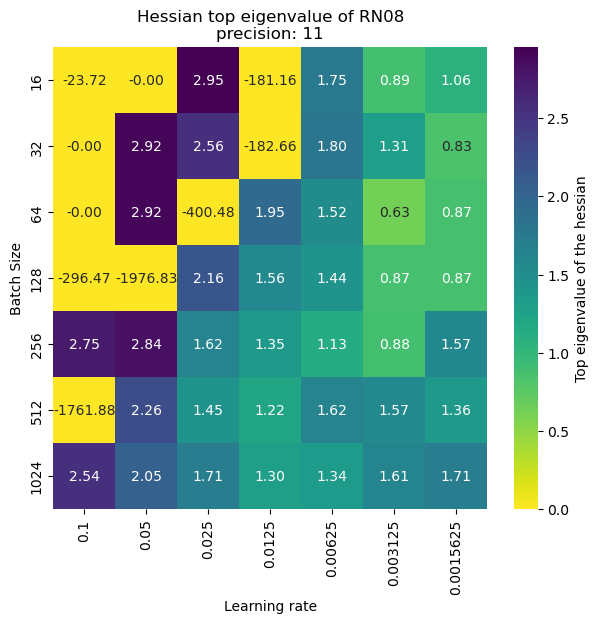

In [31]:
hessian_distribution = []
for p in precisions:
    trace_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    eigen_matrix = np.zeros((len(batch_sizes), len(learning_rates)))
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            path = os.path.join(DATA_PATH, f'bs{bs}_lr{lr}/RN08_{p}b/')
            
            trace = 0
            eigen_value = 0
            try:
                result = read_file(path)
                trace = sum(result['trace'])
                eigen_value = result['eigenvalues'][0]
            except:
                print("Error: cannot open the file!")
                
            trace_matrix[x, y] = trace
            eigen_matrix[x, y] = eigen_value
            
            hessian_distribution.append({
                'precision': p, 
                'trace': trace,
                'eigenvalue': eigen_value,
                'batch_size': str(bs),
                'learning_rate': str(lr),
            })
            
    log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
    log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)
    
    log_trace_matrix = pd.DataFrame(log_trace_matrix, 
                                    index=batch_sizes, 
                                    columns=learning_rates)
    log_eigen_matrix = pd.DataFrame(log_eigen_matrix, 
                                    index=batch_sizes, 
                                    columns=learning_rates)
    
    print('-'*100)
    
    plot_2d_heatmap(log_trace_matrix, 
                    f'Hessian Trace of RN08\nprecision: {p}', 
                    (0, np.log10(trace_matrix.max().max())),
                    'Learning rate',
                    'Batch Size',
                    'Trace of the hessian',
                    cmap='viridis_r')
    
    
    plot_2d_heatmap(log_eigen_matrix, 
                    f'Hessian top eigenvalue of RN08\nprecision: {p}', 
                    (0, np.log10(eigen_matrix.max().max())),
                    'Learning rate',
                    'Batch Size',
                    'Top eigenvalue of the hessian',
                    cmap='viridis_r')


In [32]:
hessian_distribution_df = pd.DataFrame(hessian_distribution)
hessian_distribution_df.to_csv("./results/rn08/hessian.csv", index=False)

/tmp/ipykernel_66301/4159301824.py:22: RuntimeWarning: invalid value encountered in log10
  log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
/tmp/ipykernel_66301/4159301824.py:23: RuntimeWarning: invalid value encountered in log10
  log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)


----------------------------------------------------------------------------------------------------


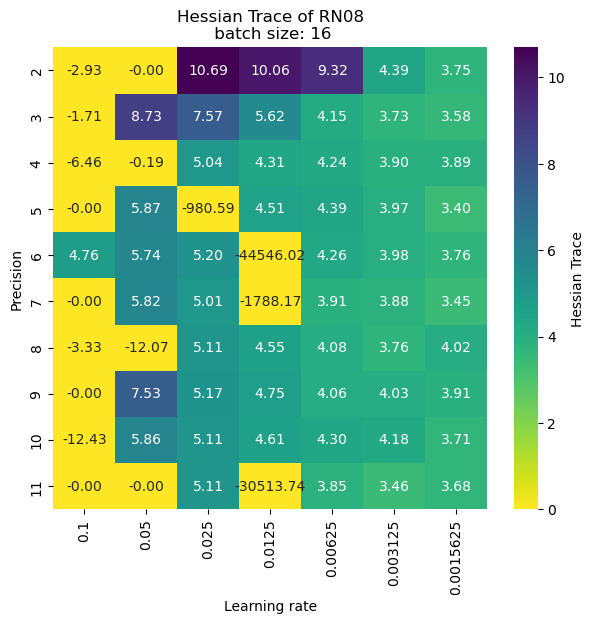

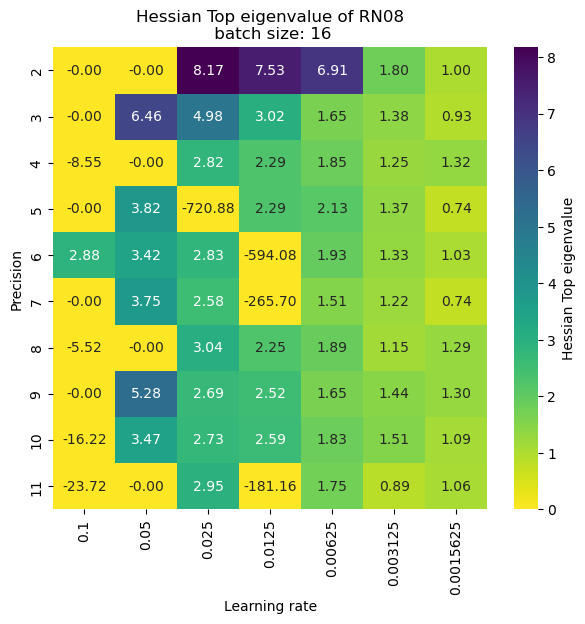

/tmp/ipykernel_66301/4159301824.py:22: RuntimeWarning: divide by zero encountered in log10
  log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
/tmp/ipykernel_66301/4159301824.py:23: RuntimeWarning: divide by zero encountered in log10
  log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)


----------------------------------------------------------------------------------------------------


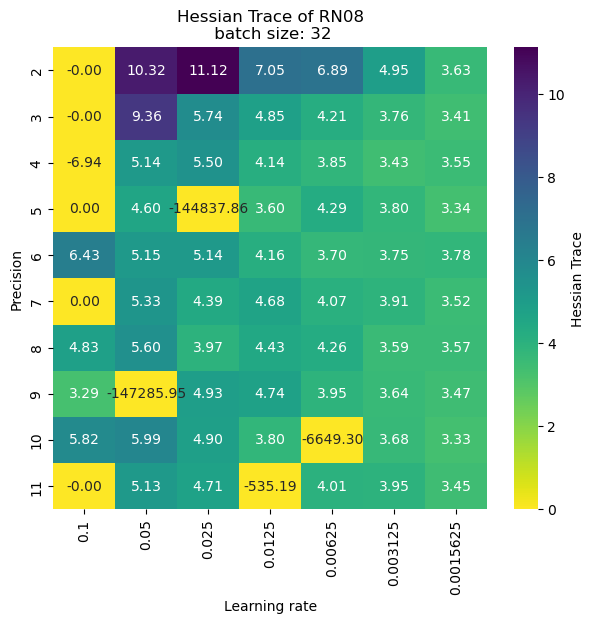

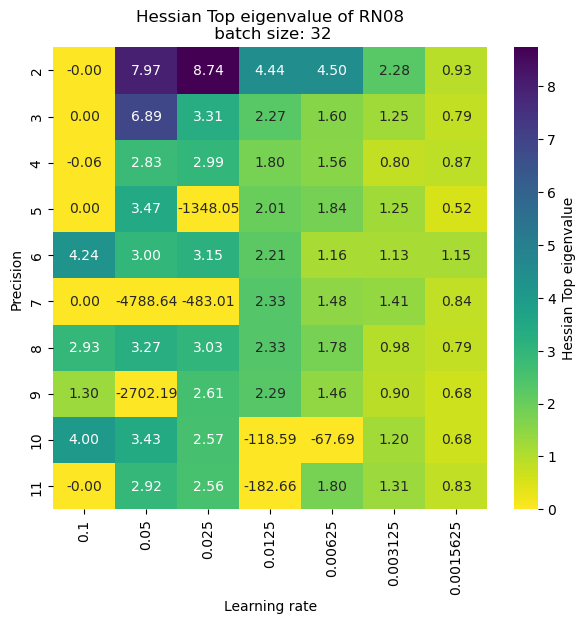

----------------------------------------------------------------------------------------------------


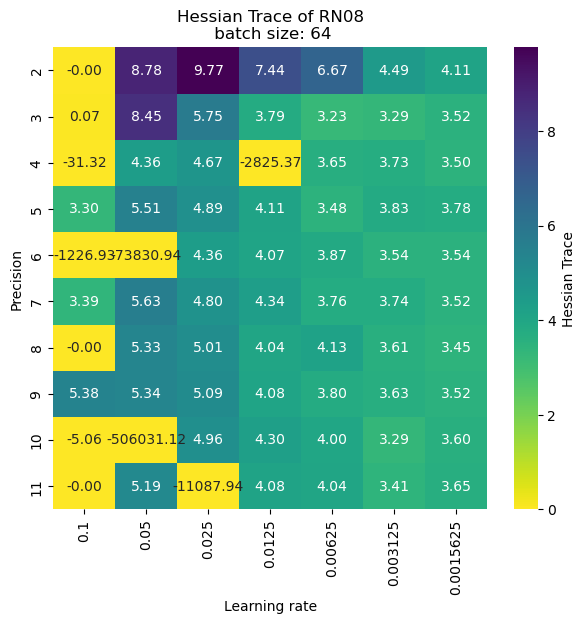

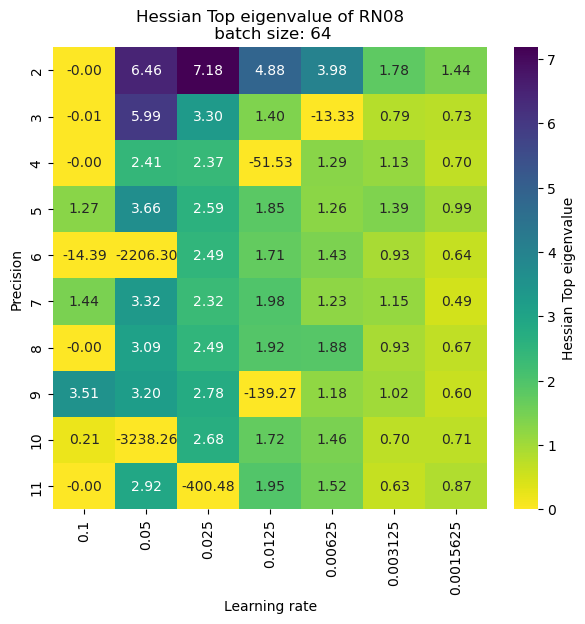

----------------------------------------------------------------------------------------------------


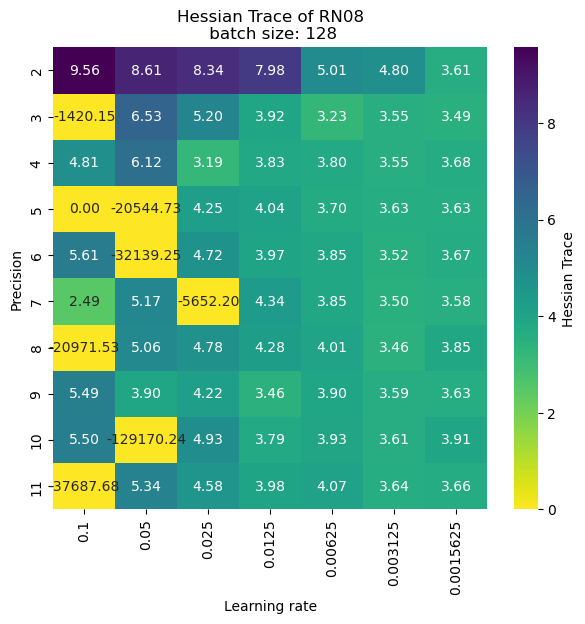

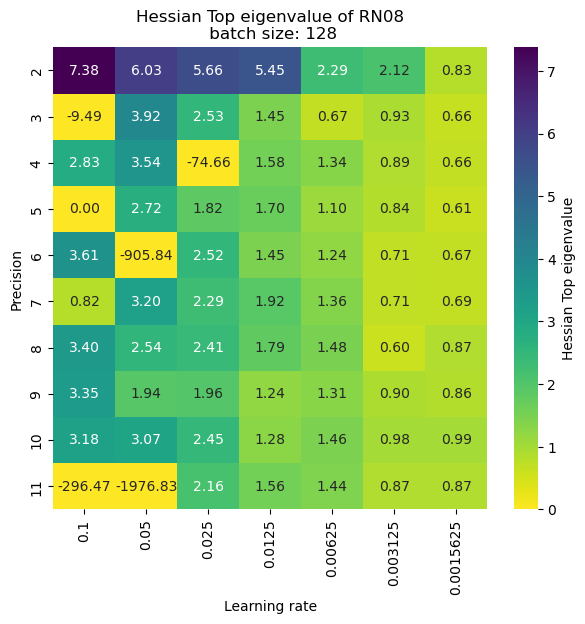

----------------------------------------------------------------------------------------------------


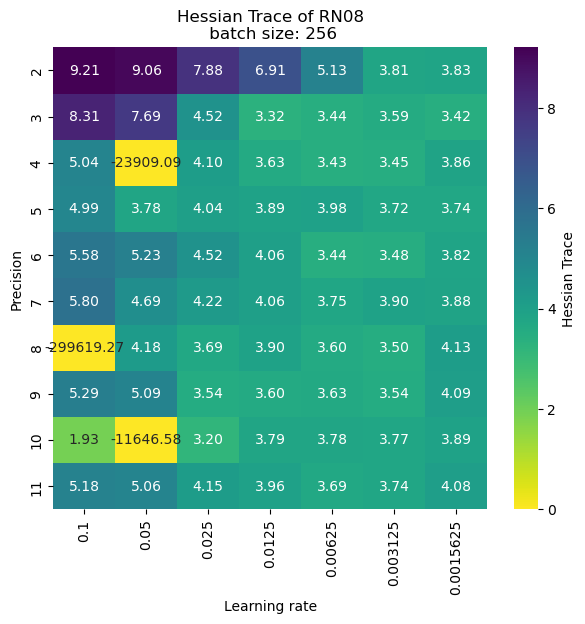

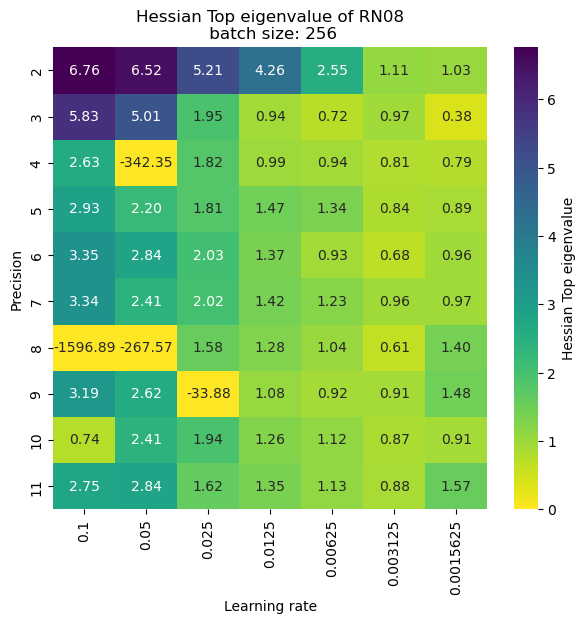

----------------------------------------------------------------------------------------------------


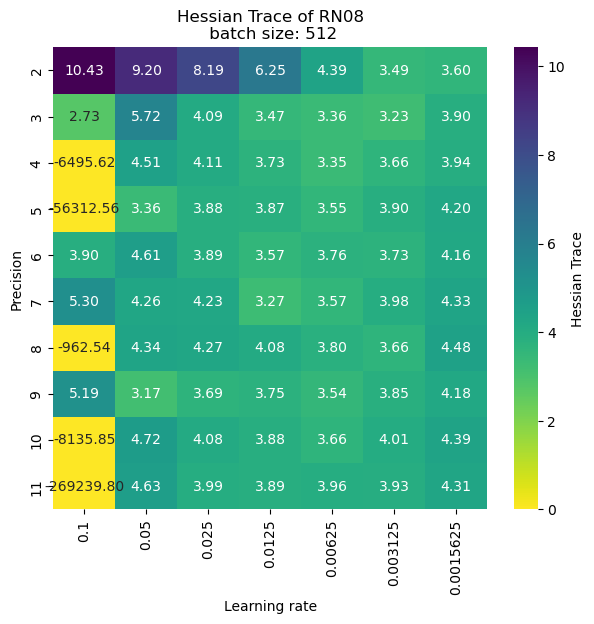

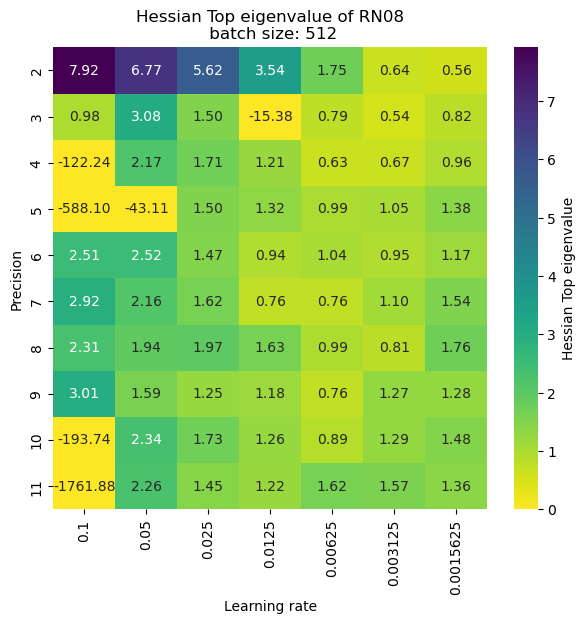

----------------------------------------------------------------------------------------------------


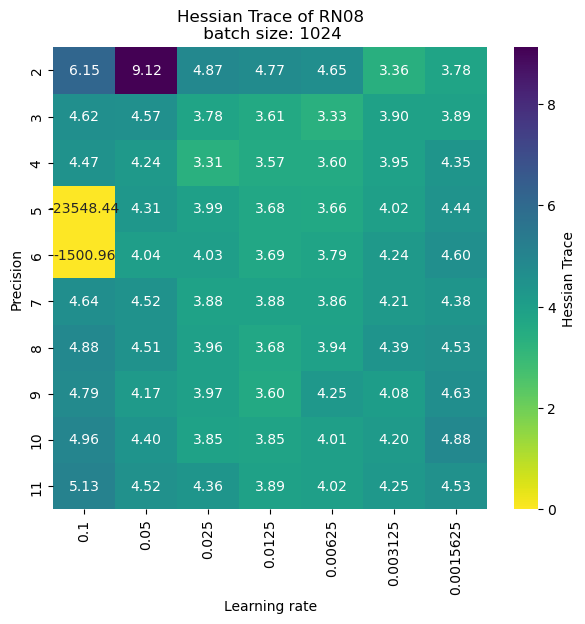

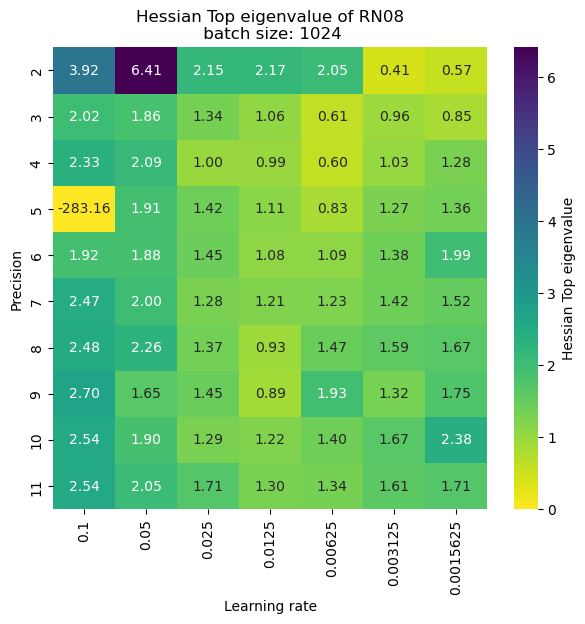

In [33]:
for bs in batch_sizes:
    trace_matrix = np.zeros((len(precisions), len(learning_rates)))
    eigen_matrix = np.zeros((len(precisions), len(learning_rates)))
    for y, lr in enumerate(learning_rates):
        for x, p in enumerate(precisions):

            path = os.path.join(DATA_PATH, f'bs{bs}_lr{lr}/RN08_{p}b/')
            
            trace = 0
            eigen_value = 0
            try:
                result = read_file(path)
                trace = sum(result['trace'])
                eigen_value = result['eigenvalues'][0]
            except:
                print("Error: cannot open the file!")
                
            trace_matrix[x, y] = trace
            eigen_matrix[x, y] = eigen_value
                
            
    log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
    log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)
    
    log_trace_matrix = pd.DataFrame(log_trace_matrix, 
                                    index=precisions, 
                                    columns=learning_rates)
    log_eigen_matrix = pd.DataFrame(log_eigen_matrix, 
                                    index=precisions, 
                                    columns=learning_rates)
    print('-'*100)
    
    plot_2d_heatmap(log_trace_matrix, 
                    f'Hessian Trace of RN08\n batch size: {bs}', 
                    (0, np.log10(trace_matrix.max().max())),
                    'Learning rate',
                    'Precision',
                    'Hessian Trace',
                    cmap='viridis_r')
    plot_2d_heatmap(log_eigen_matrix, 
                    f'Hessian Top eigenvalue of RN08\n batch size: {bs}', 
                    (0, np.log10(eigen_matrix.max().max())),
                    'Learning rate',
                    'Precision',
                    'Hessian Top eigenvalue',
                    cmap='viridis_r')

/tmp/ipykernel_66301/1448629409.py:25: RuntimeWarning: divide by zero encountered in log10
  log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
/tmp/ipykernel_66301/1448629409.py:25: RuntimeWarning: invalid value encountered in log10
  log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
/tmp/ipykernel_66301/1448629409.py:26: RuntimeWarning: divide by zero encountered in log10
  log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)
/tmp/ipykernel_66301/1448629409.py:26: RuntimeWarning: invalid value encountered in log10
  log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)


----------------------------------------------------------------------------------------------------


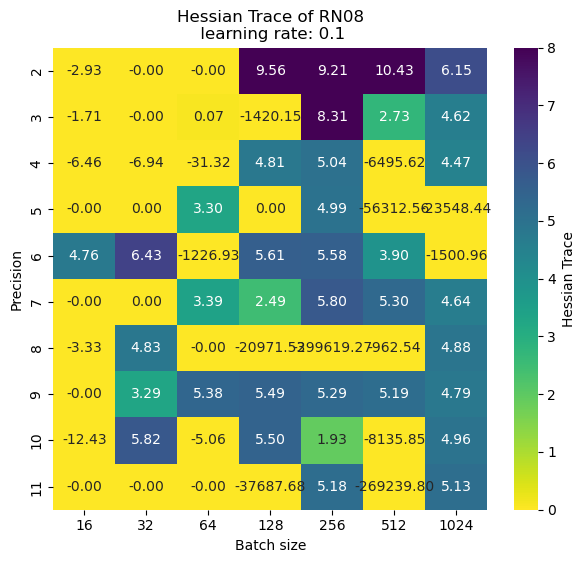

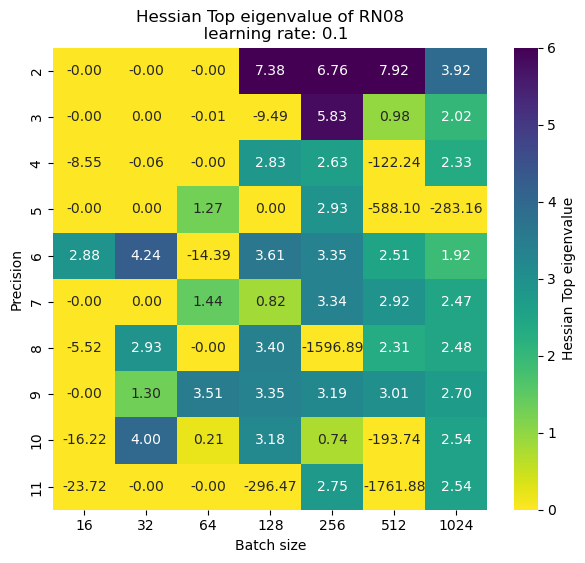

----------------------------------------------------------------------------------------------------


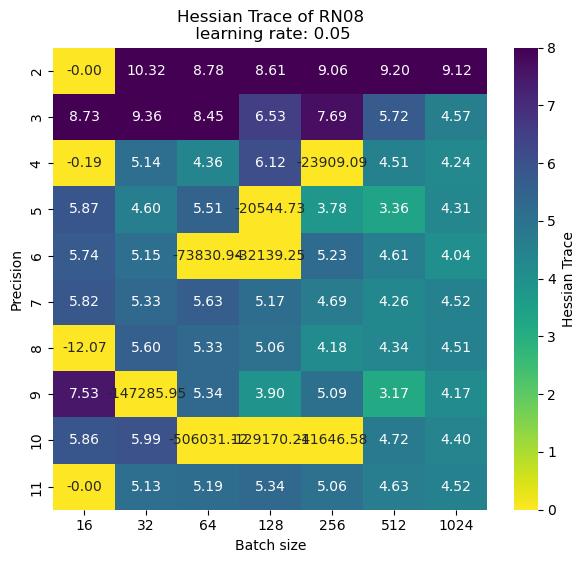

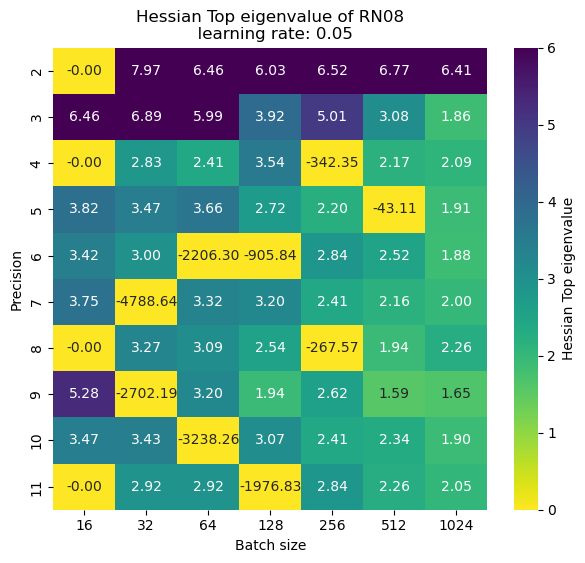

----------------------------------------------------------------------------------------------------


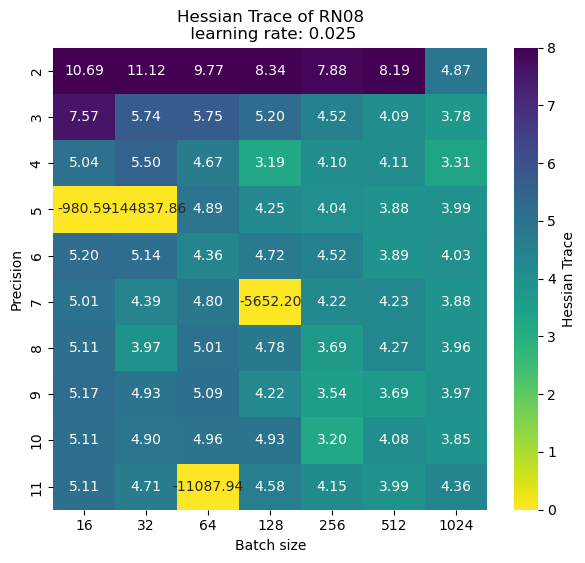

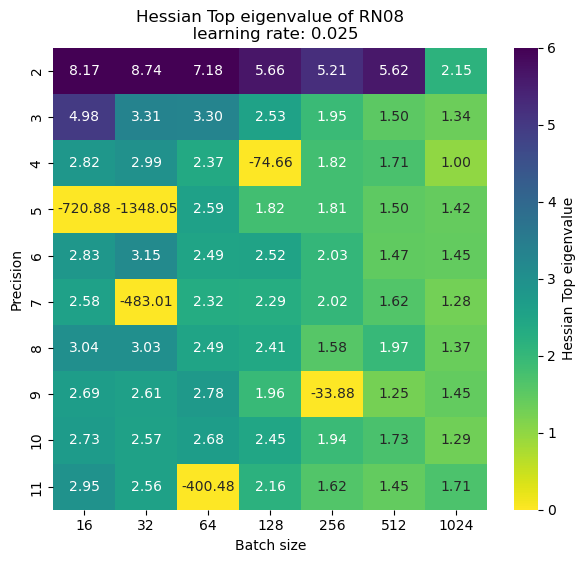

----------------------------------------------------------------------------------------------------


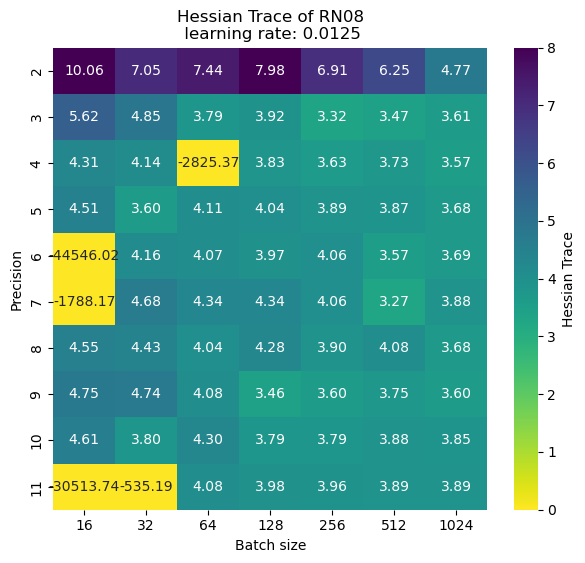

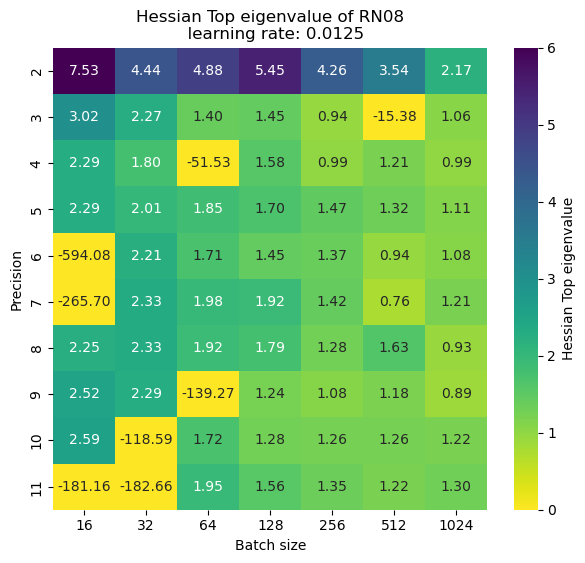

----------------------------------------------------------------------------------------------------


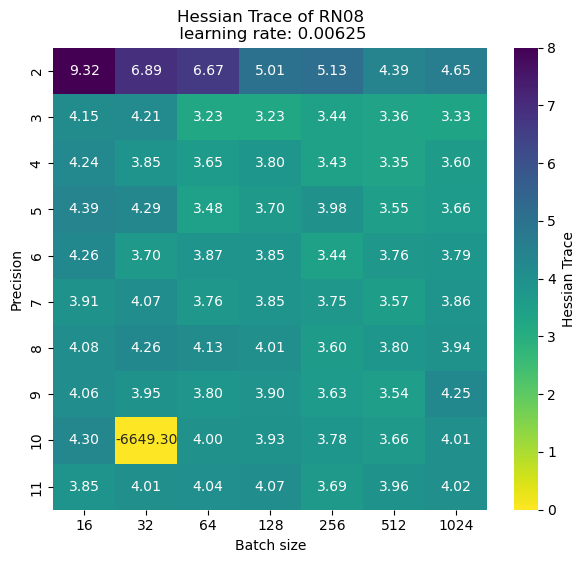

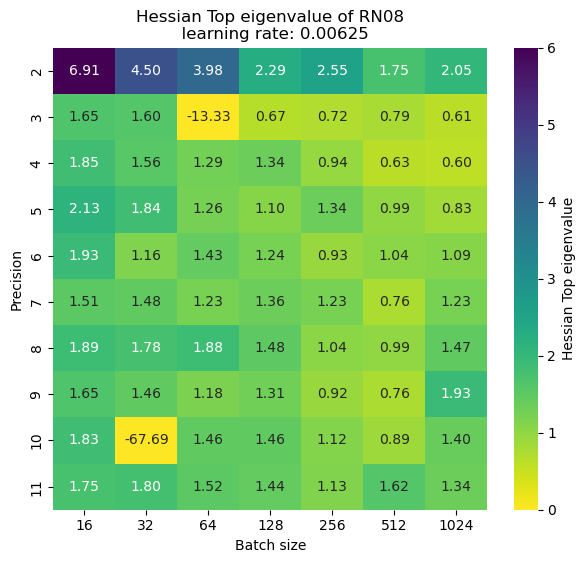

----------------------------------------------------------------------------------------------------


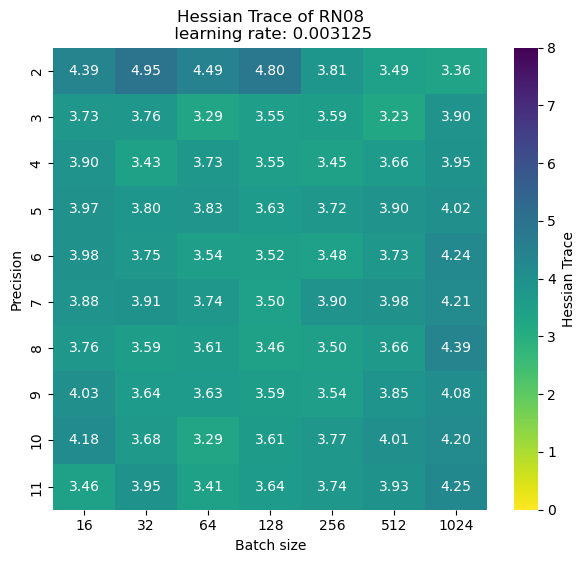

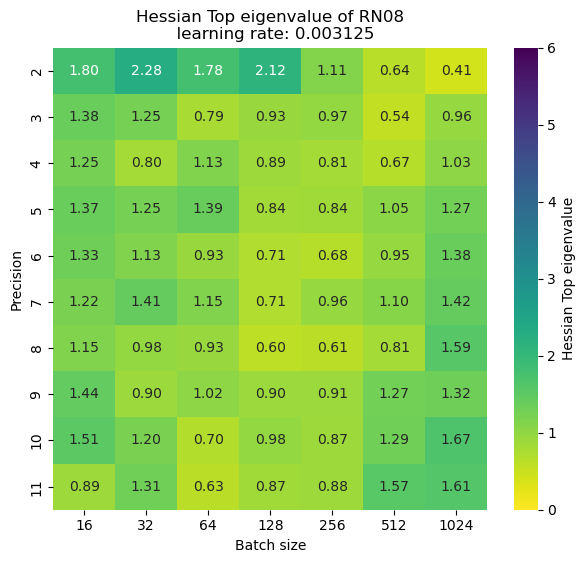

----------------------------------------------------------------------------------------------------


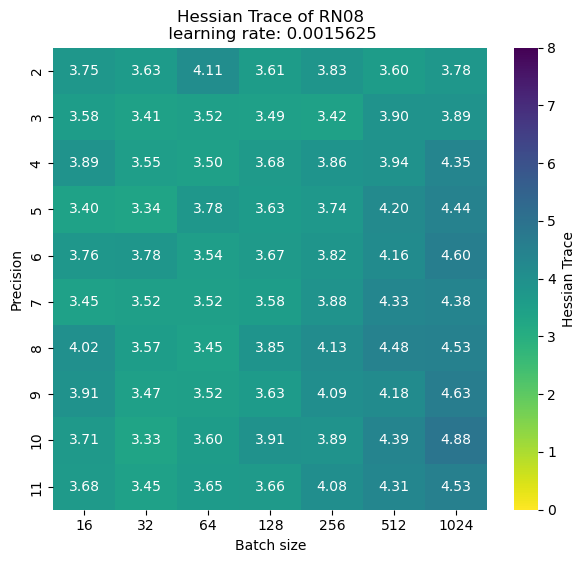

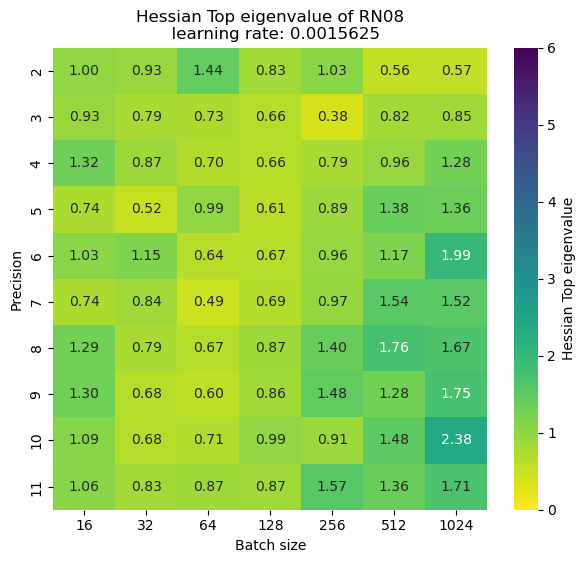

In [34]:
for lr in learning_rates:
    trace_matrix = np.zeros((len(precisions), len(batch_sizes)))
    eigen_matrix = np.zeros((len(precisions), len(batch_sizes)))
    for y, bs in enumerate(batch_sizes):
        for x, p in enumerate(precisions):
            
            path = os.path.join(DATA_PATH, f'bs{bs}_lr{lr}/RN08_{p}b/')
            
            trace = 0
            eigen_value = 0
            try:
                result = read_file(path)
                trace = sum(result['trace'])
                eigen_value = result['eigenvalues'][0]
            except:
                print("Error: cannot open the file!")
                
            trace_matrix[x, y] = trace
            eigen_matrix[x, y] = eigen_value
                
            trace_matrix[x, y] = trace
            eigen_matrix[x, y] = eigen_value
                
            
    log_trace_matrix = np.where(trace_matrix > 0, np.log10(trace_matrix), trace_matrix)
    log_eigen_matrix = np.where(eigen_matrix > 0, np.log10(eigen_matrix), eigen_matrix)
    
    log_trace_matrix = pd.DataFrame(log_trace_matrix, 
                                    index=precisions, 
                                    columns=batch_sizes)
    log_eigen_matrix = pd.DataFrame(log_eigen_matrix, 
                                    index=precisions, 
                                    columns=batch_sizes)
    print('-'*100)
    
    plot_2d_heatmap(log_trace_matrix, 
                    f'Hessian Trace of RN08\n learning rate: {lr}', 
                    (0, 8),
                    'Batch size',
                    'Precision',
                    'Hessian Trace',
                    cmap='viridis_r')
    plot_2d_heatmap(log_eigen_matrix, 
                    f'Hessian Top eigenvalue of RN08\n  learning rate: {lr}', 
                    (0, 6),
                    'Batch size',
                    'Precision',
                    'Hessian Top eigenvalue',
                    cmap='viridis_r')